c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-06-01 19:09:54,123] A new study created in memory with name: no-name-e0a3b97e-39ae-47d7-9a09-08d59fb22f17
C:\Users\aghab\AppData\Local\Temp\ipykernel_26552\1733240526.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2024-06-01 19:09:54,132] Trial 0 finished with value: 0.003519464327347807 and parameters: {'alpha': 0.5437612408159067}. Best is trial 0 with value: 0.003519464327347807.
C:\Users\aghab\AppData\Local\Temp\ipykernel_26552\1733240526.py:55: FutureWarning: suggest_loguniform has

Best alpha for DEXUSUK: 45.365159838678224


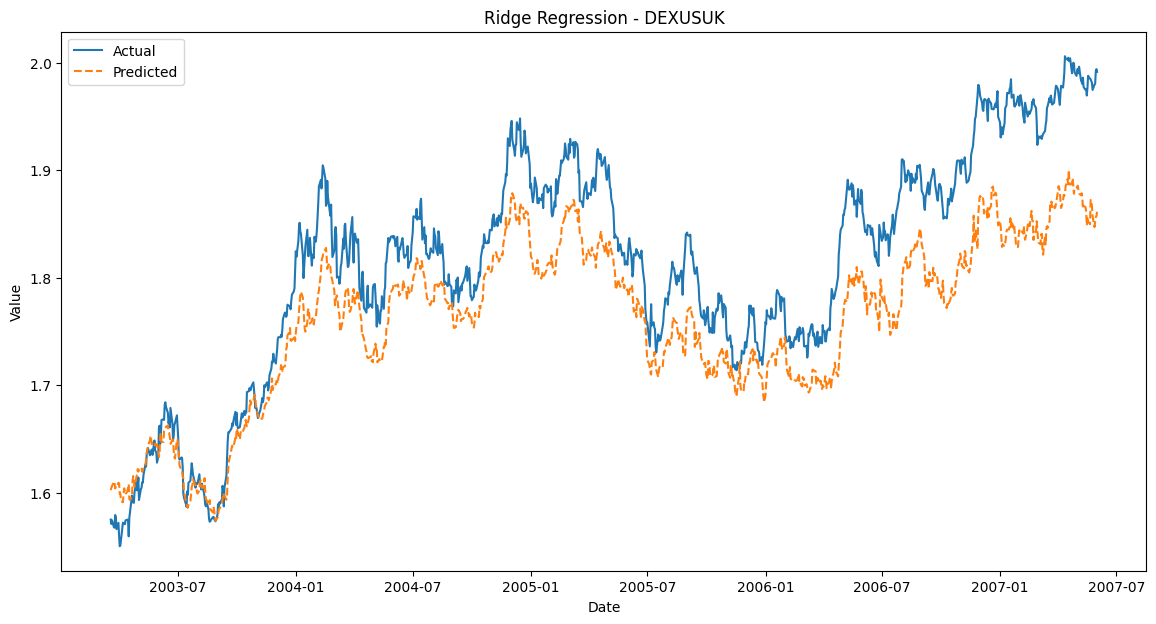

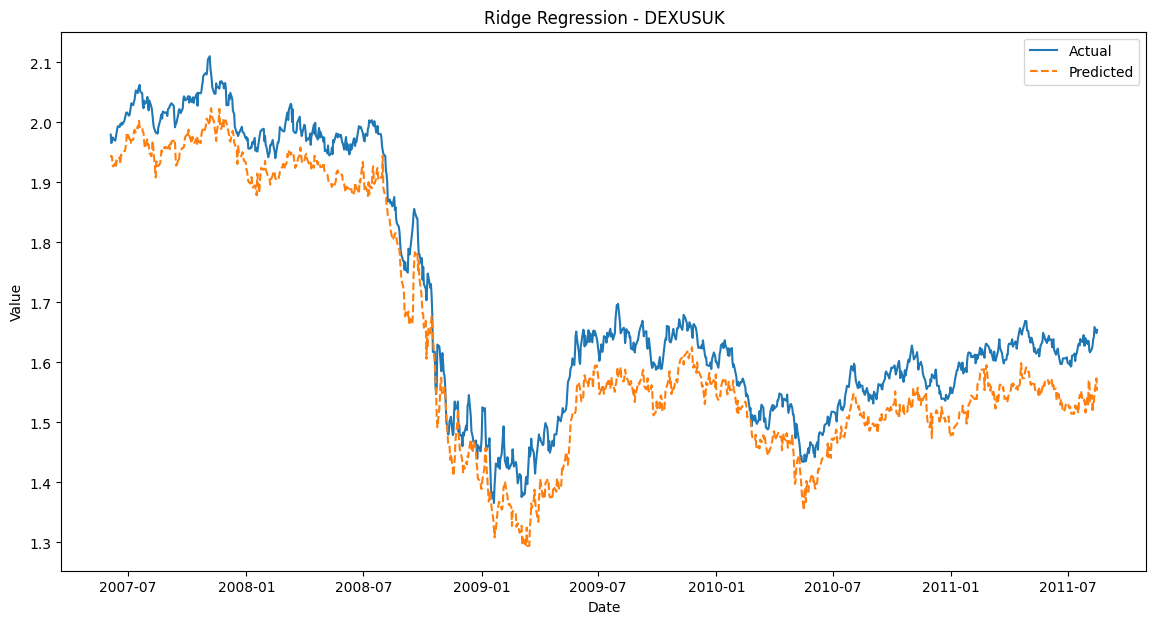

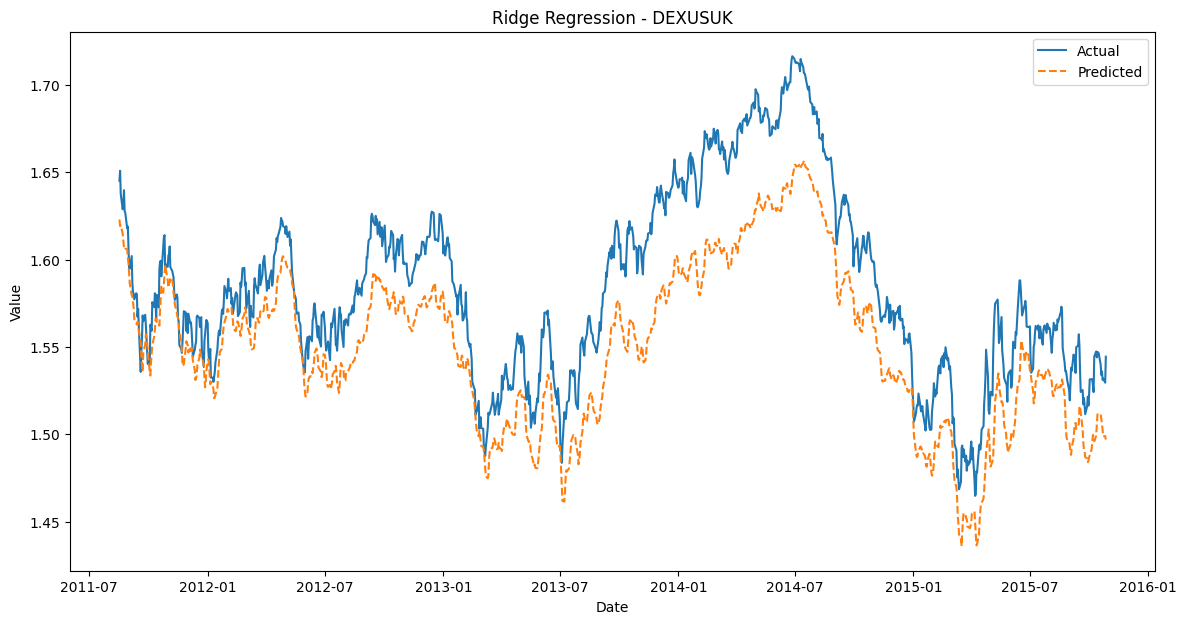

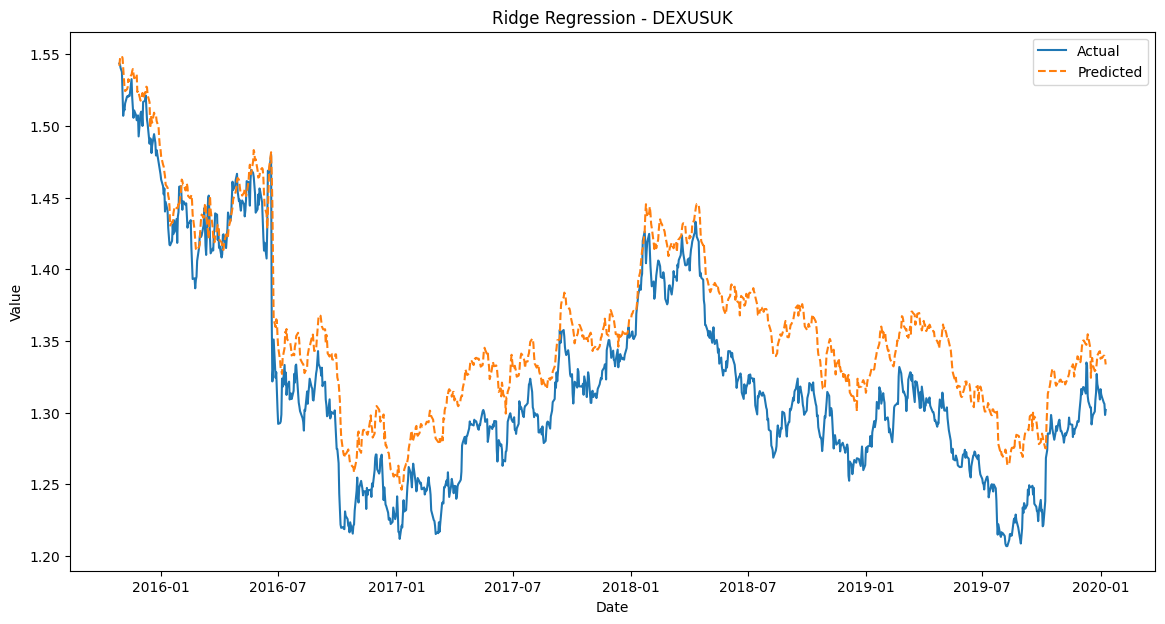

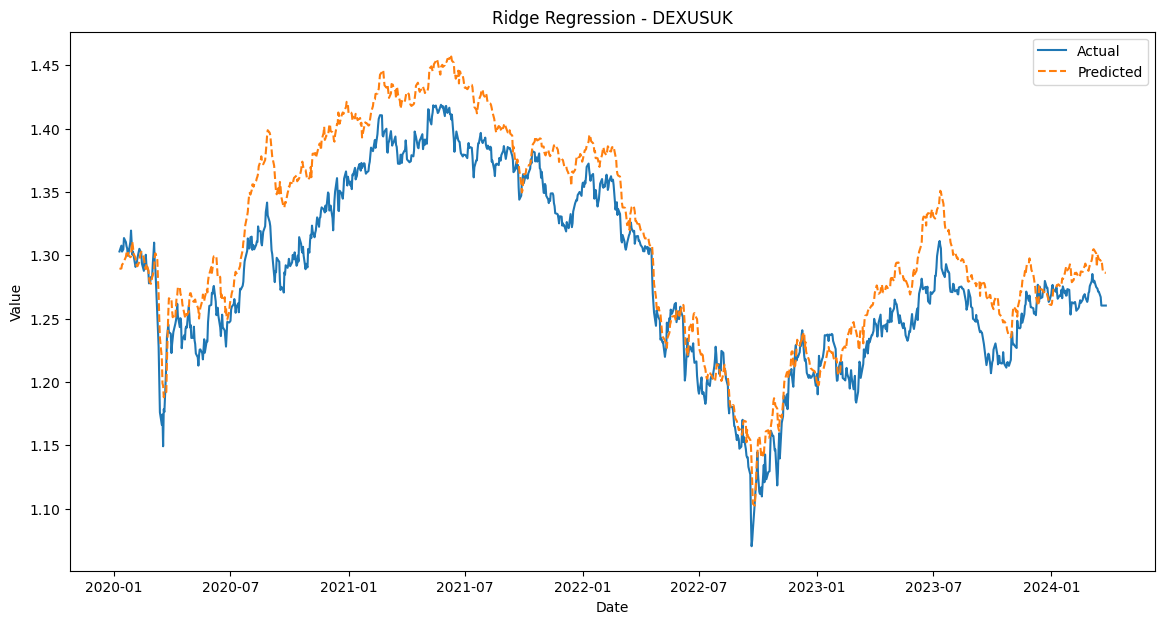

[I 2024-06-01 19:09:56,064] A new study created in memory with name: no-name-24de66b2-7738-4d50-af0a-64aa4e1e4f80
C:\Users\aghab\AppData\Local\Temp\ipykernel_26552\1733240526.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2024-06-01 19:09:56,075] Trial 0 finished with value: 0.0003288474840176612 and parameters: {'alpha': 0.045213927013521366}. Best is trial 0 with value: 0.0003288474840176612.
C:\Users\aghab\AppData\Local\Temp\ipykernel_26552\1733240526.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2024-06-01 19:09:56,083] Trial 1 finished with v

Best alpha for DEXUSEU: 3.7189698406106655


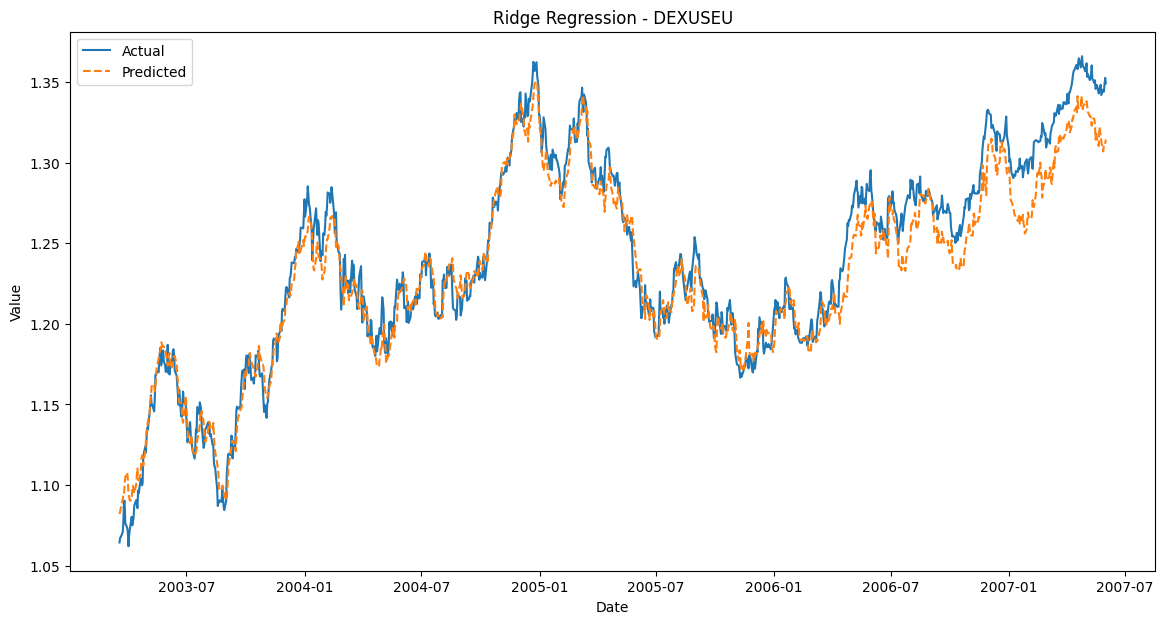

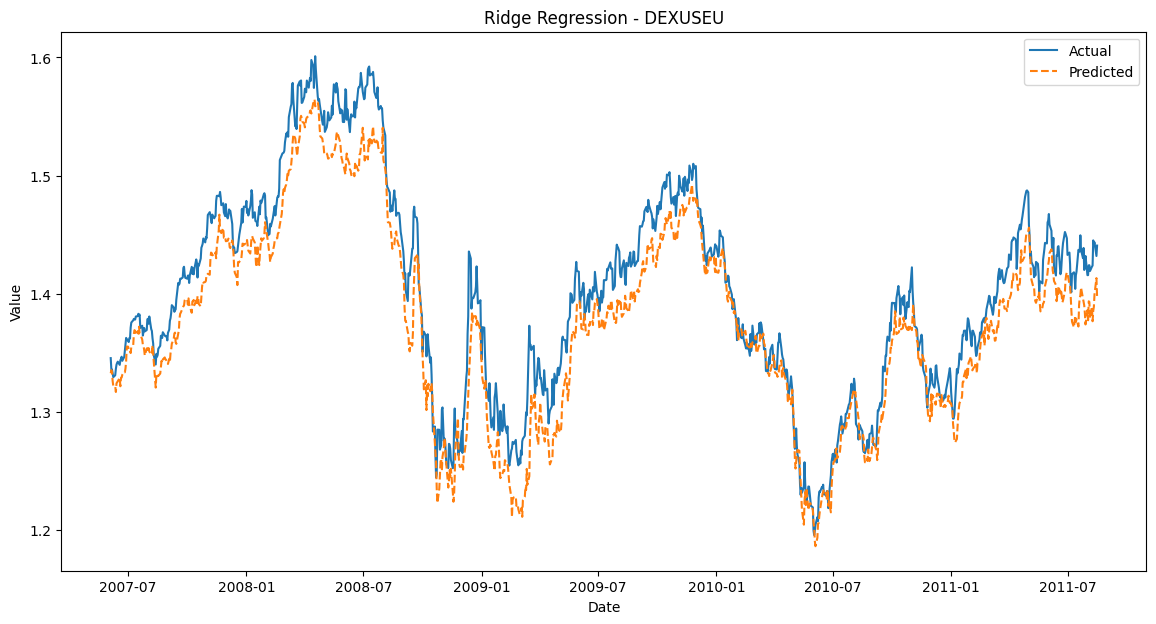

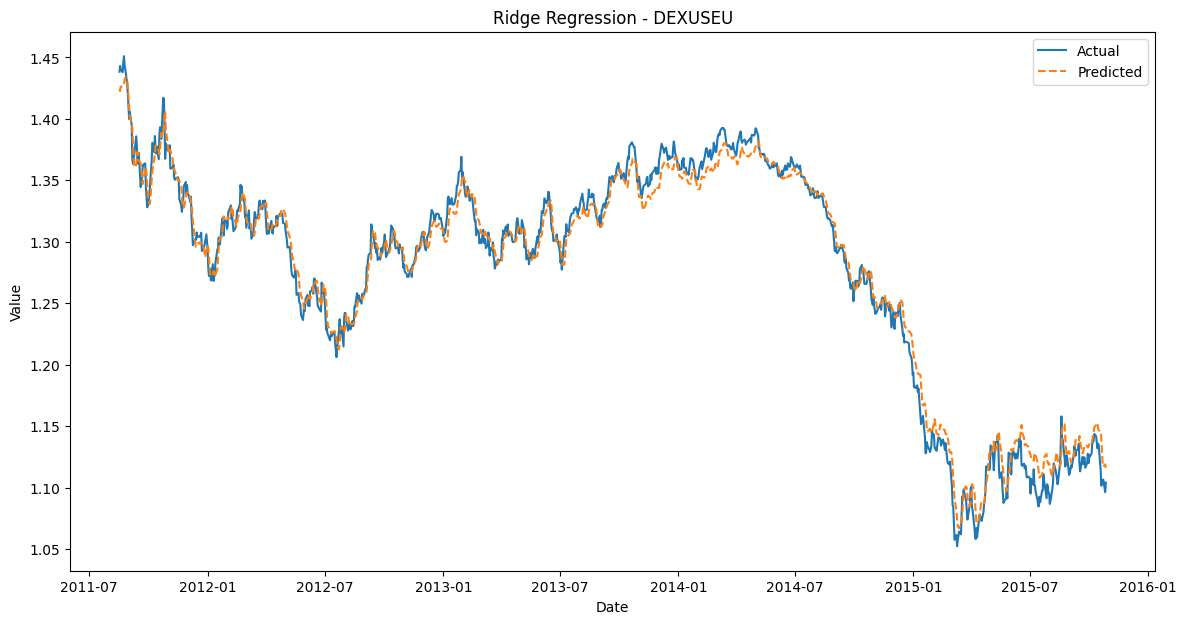

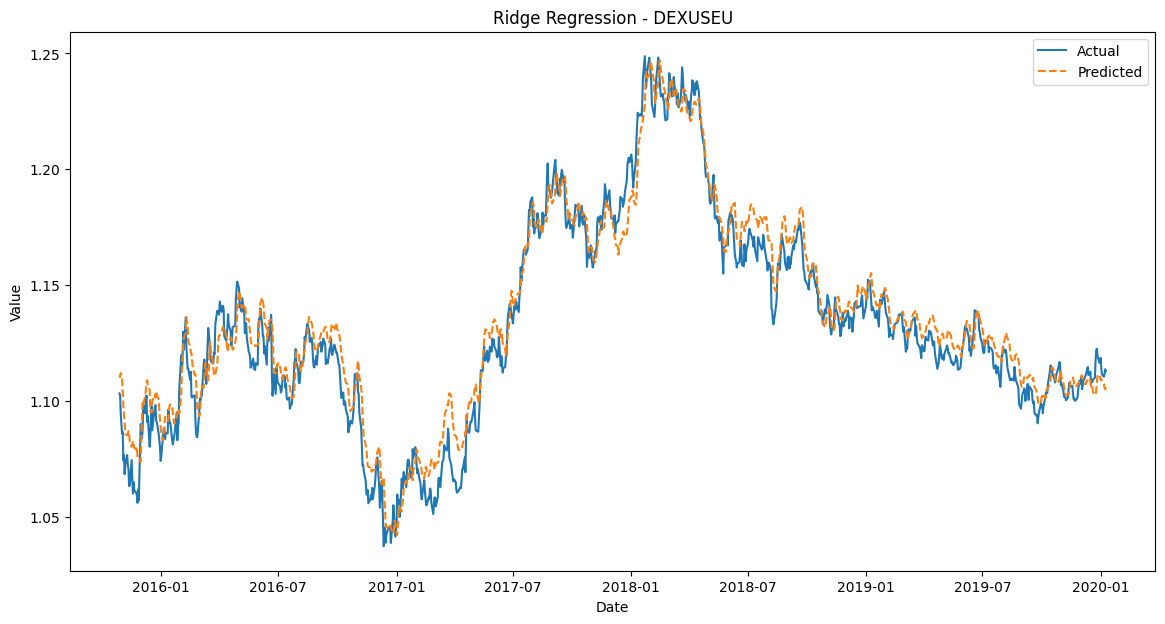

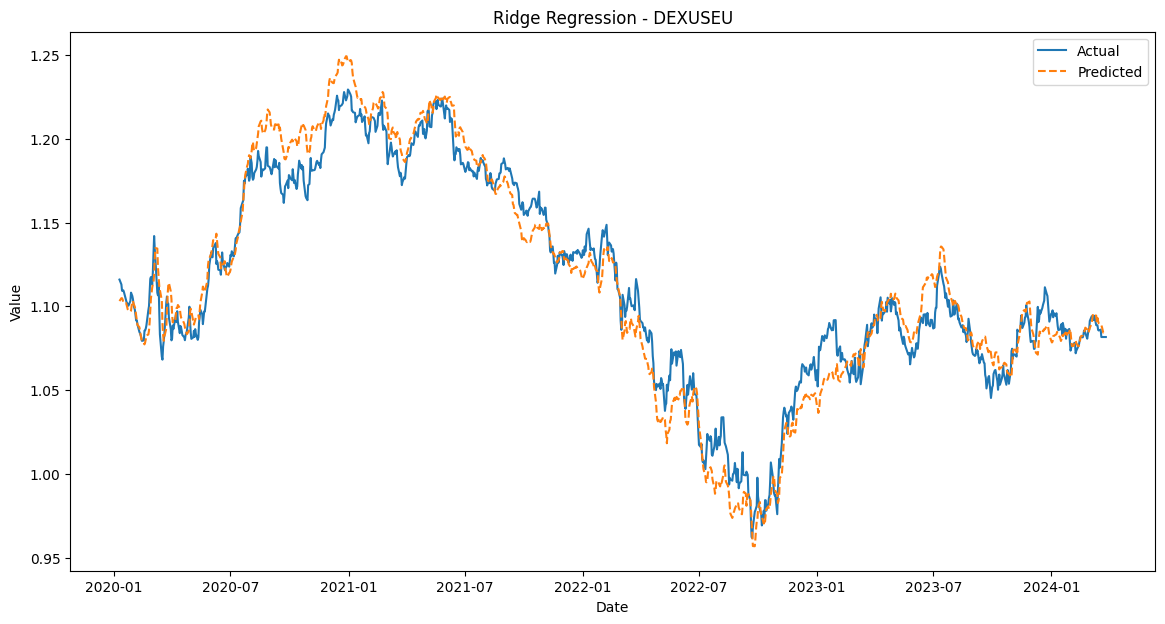

[I 2024-06-01 19:09:58,020] A new study created in memory with name: no-name-0ce2bb39-4121-4f72-9419-0831366d6803
C:\Users\aghab\AppData\Local\Temp\ipykernel_26552\1733240526.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2024-06-01 19:09:58,029] Trial 0 finished with value: 7.444137801103558e-09 and parameters: {'alpha': 21.80351280994806}. Best is trial 0 with value: 7.444137801103558e-09.
C:\Users\aghab\AppData\Local\Temp\ipykernel_26552\1733240526.py:55: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
[I 2024-06-01 19:09:58,039] Trial 1 finished with valu

Best alpha for DEXUSJP: 6.9522876707642896


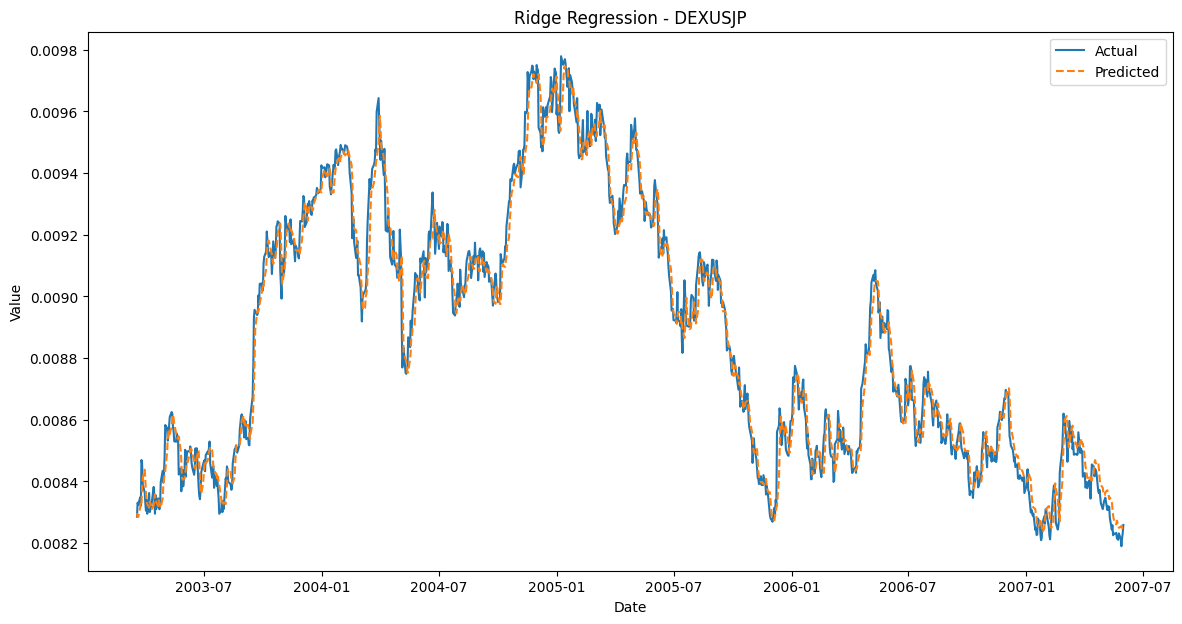

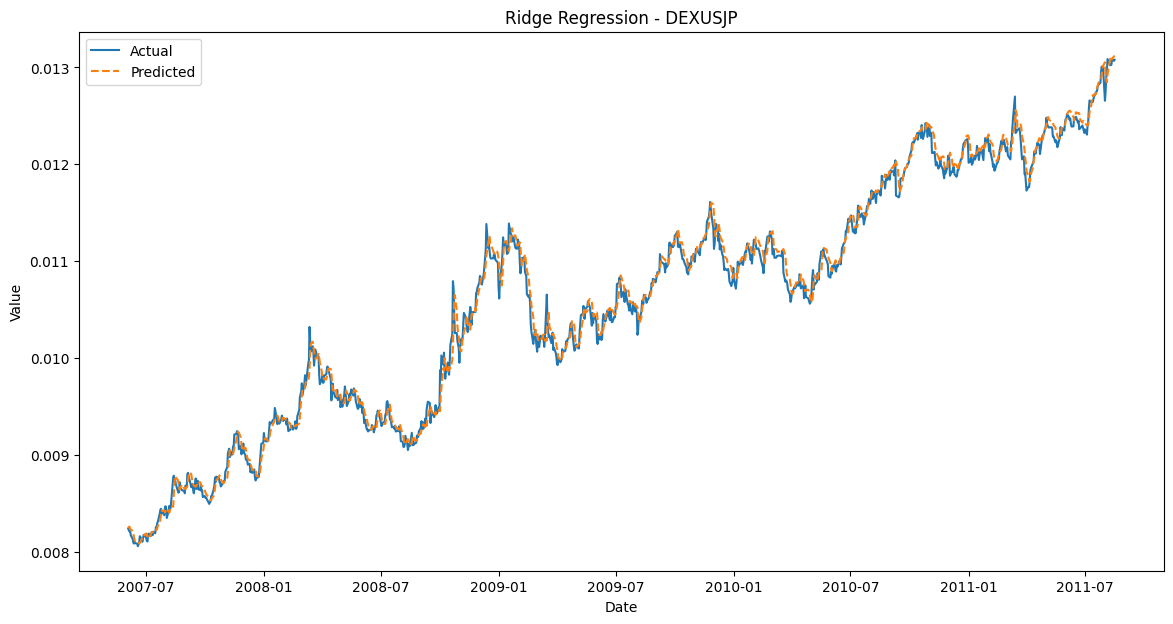

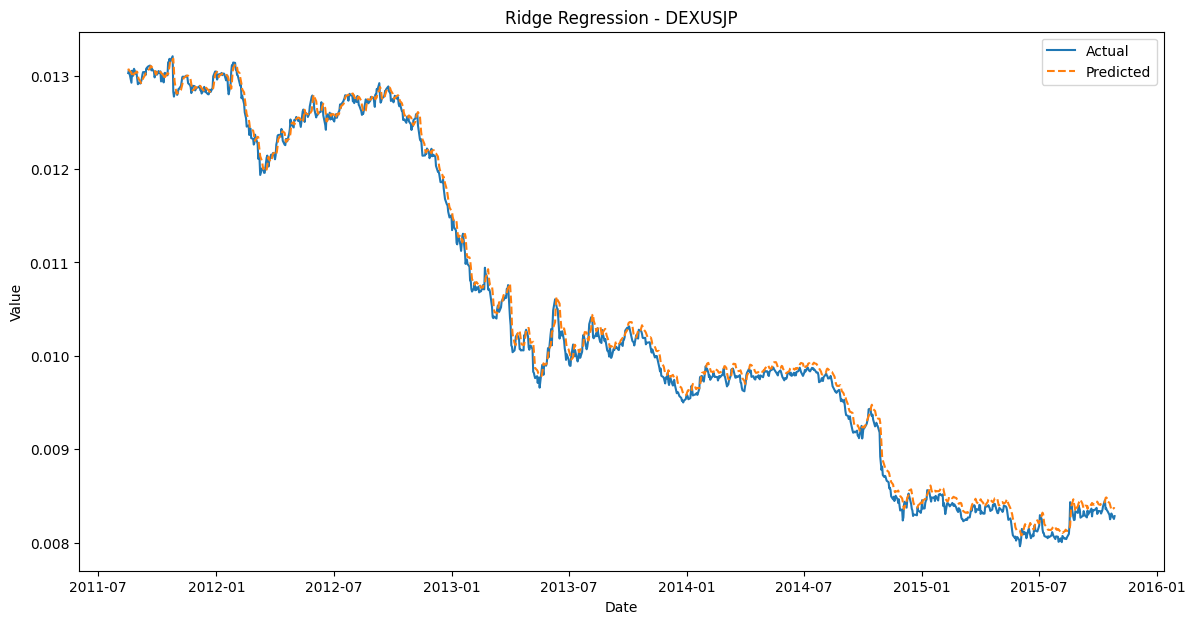

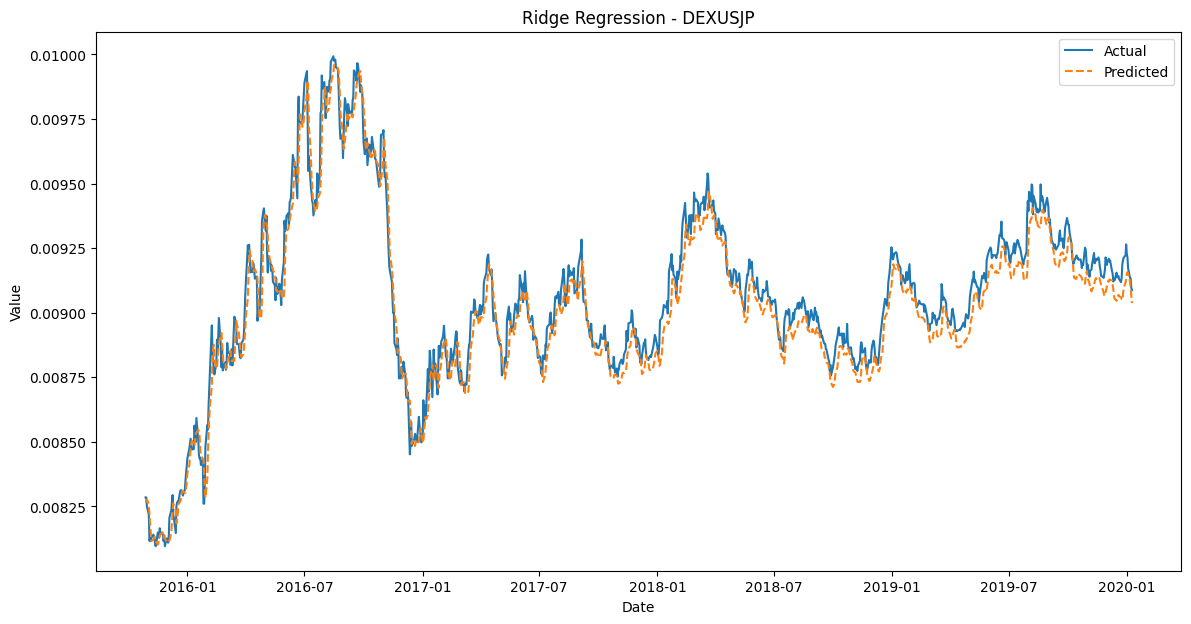

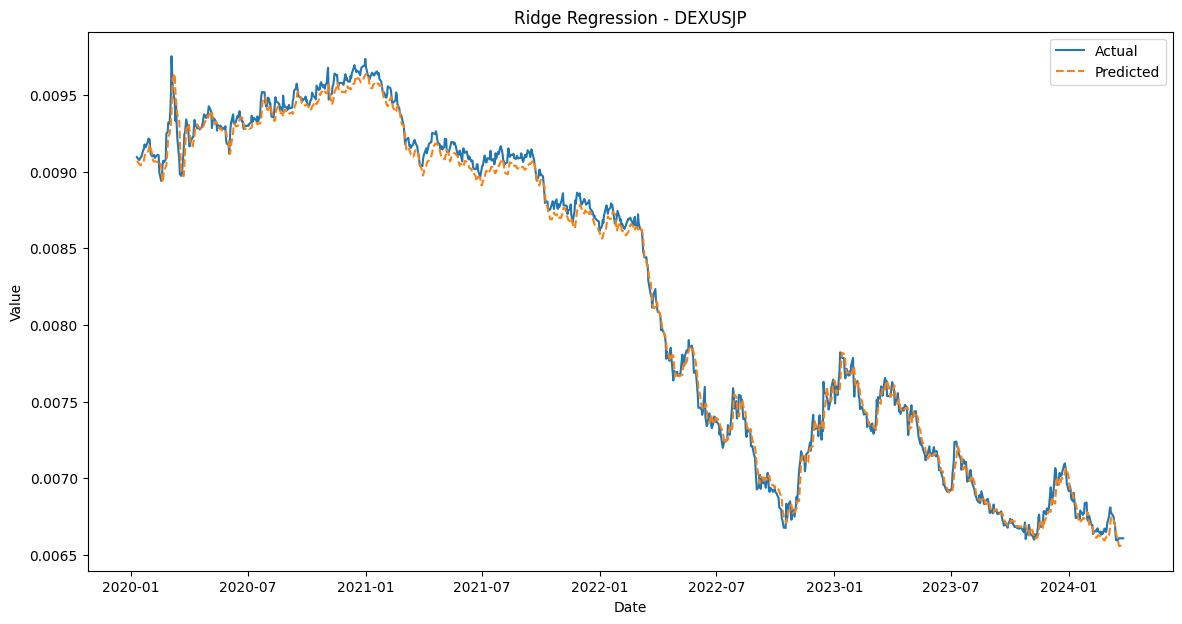

        Best Alpha Train R^2            Test R^2               Train MSE  \
              mean      mean       std      mean       std          mean   
Target                                                                     
DEXUSEU   3.718970  0.992524  0.005256  0.940534  0.039217  1.465258e-04   
DEXUSJP   6.952288  0.992302  0.005953  0.983504  0.018983  5.340369e-09   
DEXUSUK  45.365160  0.980095  0.014239  0.697309  0.141535  4.132277e-04   

                           Test MSE               Train MAE            \
                  std          mean           std      mean       std   
Target                                                                  
DEXUSEU  3.265792e-05  3.231906e-04  3.511645e-04  0.009515  0.001096   
DEXUSJP  7.327637e-10  6.724503e-09  3.018509e-09  0.000054  0.000003   
DEXUSUK  9.374652e-05  2.548278e-03  1.550148e-03  0.016293  0.001811   

         Test MAE            
             mean       std  
Target                       
DEXUSEU  0.013

In [2]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import optuna
import numpy as np

# Load the dataset
file_path = 'combined_1.csv'  # Adjust this path to your file location
data = pd.read_csv(file_path)

# Convert date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the date column as the index
data.set_index('DATE', inplace=True)

# List of target columns
target_columns = ['DEXUSUK', 'DEXUSEU', 'DEXUSJP']

# Function to create time series features
def create_time_series_features(df, target_column, lags=1):
    X = df.drop(columns=target_columns)
    for lag in range(1, lags + 1):
        X[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    y = df[target_column].shift(-lags)
    return X.dropna(), y.dropna()

# Function to plot predictions
def plot_predictions(dates, actual, predicted, target_column):
    plt.figure(figsize=(14, 7))
    plt.plot(dates, actual, label='Actual')
    plt.plot(dates, predicted, label='Predicted', linestyle='dashed')
    plt.title(f'Ridge Regression - {target_column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to remove multicollinearity using PCA
def apply_pca(X, n_components=0.95):
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    X_numeric = X[numeric_cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, scaler, pca

# Function to optimize the alpha parameter for Ridge Regression using Optuna
def optimize_alpha(trial, X, y):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e2)
    model = Ridge(alpha=alpha)
    
    tscv = TimeSeriesSplit(n_splits=5)
    mse_scores = []
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred_test))
    
    return np.mean(mse_scores)

# Initialize a list to store results
results_list = []

# Iterate through each target column and perform ridge regression
for target_column in target_columns:
    # Prepare features and labels
    X, y = create_time_series_features(data, target_column, lags=3)
    
    # Apply PCA to remove multicollinearity
    X_pca, scaler, pca = apply_pca(X)
    
    # Optimize alpha using Optuna
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: optimize_alpha(trial, X_pca, y.values), n_trials=50)
    
    best_alpha = study.best_params['alpha']
    print(f'Best alpha for {target_column}: {best_alpha}')
    
    # Split the data into training and testing sets using TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X_pca):
        X_train, X_test = X_pca[train_index], X_pca[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the model with the best alpha
        model = Ridge(alpha=best_alpha)
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate performance metrics
        train_r2 = model.score(X_train, y_train)
        test_r2 = model.score(X_test, y_test)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Append the results to the list
        results_list.append({
            'Target': target_column,
            'Best Alpha': best_alpha,
            'Train R^2': train_r2,
            'Test R^2': test_r2,
            'Train MSE': train_mse,
            'Test MSE': test_mse,
            'Train MAE': train_mae,
            'Test MAE': test_mae
        })
        
        # Plot the results
        plot_predictions(y_test.index, y_test, y_pred_test, target_column)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Calculate average and standard deviation of the performance metrics for each target column
summary_df = results_df.groupby('Target').agg({
    'Best Alpha': 'mean',
    'Train R^2': ['mean', 'std'],
    'Test R^2': ['mean', 'std'],
    'Train MSE': ['mean', 'std'],
    'Test MSE': ['mean', 'std'],
    'Train MAE': ['mean', 'std'],
    'Test MAE': ['mean', 'std']
})

# Display the summary results table
print(summary_df)

In [21]:
summary_df

Best Alpha Train R^2            Test R^2               Train MSE  \
              mean      mean       std      mean       std          mean   
Target                                                                     
DEXUSEU   3.951870  0.992522  0.005260  0.940506  0.039115  1.465363e-04   
DEXUSJP   7.103787  0.992301  0.005955  0.983508  0.018977  5.341030e-09   
DEXUSUK  46.575672  0.979961  0.014510  0.696575  0.141808  4.143026e-04   

                           Test MSE               Train MAE            \
                  std          mean           std      mean       std   
Target                                                                  
DEXUSEU  3.264295e-05  3.231612e-04  3.503301e-04  0.009516  0.001095   
DEXUSJP  7.322983e-10  6.724096e-09  3.013420e-09  0.000054  0.000003   
DEXUSUK  9.226625e-05  2.548431e-03  1.544877e-03  0.016320  0.001772   

         Test MAE            
             mean       std  
Target                       
DEXUSEU  0.013364  0.007218  
DEXUSJP  0.000063  0.000013  
DEXUSUK  0.043488  0.014250

In [3]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values for each target column
def plot_actual_vs_predicted(results_df):
    for target_column in target_columns:
        plt.figure(figsize=(14, 7))
        all_dates = []
        all_actual = []
        all_predicted = []
        
        for index, row in results_df[results_df['Target'] == target_column].iterrows():
            dates = data.iloc[row['Test Indexes']].index
            actual = row['Actual Test Values']
            predicted = row['Predicted Test Values']
            
            all_dates.extend(dates)
            all_actual.extend(actual)
            all_predicted.extend(predicted)
        
        plt.plot(all_dates, all_actual, label='Actual')
        plt.plot(all_dates, all_predicted, label='Predicted', linestyle='dashed')
        plt.title(f'Overall Actual vs Predicted - {target_column}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

# Function to plot errors (MSE and MAE) for train and test sets
def plot_errors(results_df, metric, target_column):
    train_errors = results_df[results_df['Target'] == target_column][f'Train {metric}'].values
    test_errors = results_df[results_df['Target'] == target_column][f'Test {metric}'].values
    labels = [f'Fold {i+1}' for i in range(len(train_errors))]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 7))
    rects1 = ax.bar(x - width/2, train_errors, width, label='Train')
    rects2 = ax.bar(x + width/2, test_errors, width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Folds')
    ax.set_ylabel(metric)
    ax.set_title(f'Train vs Test {metric} - {target_column}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

# Extracting the necessary information for plotting
results_df['Test Dates'] = results_df.apply(lambda row: data.index[row['Test Indexes']], axis=1)
results_df['Actual Test Values'] = results_df.apply(lambda row: data.loc[data.index[row['Test Indexes']], row['Target']], axis=1)
results_df['Predicted Test Values'] = results_df.apply(lambda row: row['Predicted Test Values'], axis=1)

# Plot actual vs predicted for each target column
plot_actual_vs_predicted(results_df)

# Plot errors for each target column
metrics = ['MSE', 'MAE']
for target_column in target_columns:
    for metric in metrics:
        plot_errors(results_df, metric, target_column)


KeyError: 'Test Indexes'